# [Project] 와인 정보 검색 및 이미지 인식을 통한 상품 정보 제공

## 프로젝트 목표
  - 와인에 대한 정보를 제공함으로써 선호에 맞는 와인을 찾읈 수 있게 한다.
  - 와인 이미지를 인식해 정보를 제공함으로써 구매 현장에서의 현명한 판단을 돕도록 한다


## 프로젝트 목차

    1. 데이터 읽기 : kaggle dataset에서 다운받은 wine inforamtion(https://www.kaggle.com/dev7halo/wine-information)을 불러오기, 와인 이미지 데이터 크롤링.
      1-1. 데이터 불러오기 
      1-2. 이미지 데이터 크롤링
  
    2. 데이터 정제 : 핵심 변수를 파악, 비어있는 데이터 및 불필요한 데이터를 삭제.
      2-1. 결측값 확인
      2-2. 결측값 처리

    3. 데이터 시각화 : 변수 시각화를 통해서 분포 파악.
    4. 데이터 전 처리 : 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리
    5. 머신러닝 기본 학습 : 딥러닝을 활용하여 학습 수행
      5-1. 모델 구현
      5-2. 학습 수행
    6. 평가 및 예측 : 학습된 모델을 바탕으로 평가 및 예측 수행

## 데이터 출처

  - https://www.kaggle.com/dev7halo/wine-information

## 프로젝트 개요
 코로나 시대로 인해서 집에서 여가를 보내는 사람이 많아졌다. 이와 더불어 집에서 소소하게 음주문화를 즐기는 이른바 '혼술'문화가 확장되어 '혼술족'이라는 단어로 이어졌다. 주류 판매점에 가서 술을 마시는 경우에는 직원(바텐더 등)을 통해서 상품을 추천받을 수 있지만, 판매점에서 직접 주류를 선택해야하는 혼술족 입장에서 국문으로 표기되지 않은 와인은 외면받을 뿐이다. 용기내어 가판대에 다가가더라도 술 하나하나 핸드폰으로 검색하며 본인의 취항을 맞추기에는 여전히 많은 노력을 필요로 한다. 이런 상황을 마주하는 이들에게 솔루션이 되어주고 싶다.

 와인의 맛을 좌우하는 알코올 도수(Alcohol by Volume), 마시는 온도(Drinking Temperature)와  당도(Sweet), 산도(Acidity), 바디감(Body), 탄닌(tannin)등, 본인이 선호하는 정도(degree)를 어플리케이션 내에 설정하고, 스마트폰 카메라로 가판대를 스캔하면서 본인의 선호도를 기준으로 선호점수를 매겨주는 서비스가 있다면 어떨까.
 와인에 조금 더 익숙해진다면, 파커포인트와 같은 소믈리에들의 점수를 반영 해 주기도 하고, 이미 경험한 와인의 히스토리를 기록해 추천알고리즘을 동작시켜준다면 문화를 더욱 풍요롭게 만들어 줄 것이다.
 
 이 프로젝트는 이런 서비스를 기획, 개발하기위한 초석이 된다.

## 1. 데이터 읽기





### 1-1. 데이터 불러오기
 pandas를 사용하여 cleansingWine.csv를 읽고 dataframe형태로 저장한다.
 사용할 데이터 셋에는 총 2만개 이상의 데이터가 있는데, 프로젝트의 효율을 위해서 상위 20개의 데이터만 추려서 진행한다.


In [4]:
import pandas as pd
import numpy as np

data_set = pd.read_csv("./archive/cleansingWine.csv")
len(data_set)

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


21605

### 1-2. 이미지 데이터 크롤링

 와인에 대한 이미지를 야후에서 크롤링한다. 아래 코드는 크롤링 작업을 진행하는데, 이미 파일에 추가되어 있으니 실행하지 않도록 주의하자. (혹시나 파일이 읽히지 않는다면 실행하기!)

In [5]:
import os



In [6]:
#**************************이미지 크롤링을 진행하는 단계입니다 실행에 유의하세요!!!**************************#
names = data_set["name"]


import os
from bs4 import BeautifulSoup
from selenium import webdriver
from urllib.request import urlopen

# 크롤링이 되는 사이트가 야후 뿐이였음..
url = "https://images.search.yahoo.com/search/images?p={}%20wine"

path='/home/lee/chromedriver'
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome(executable_path=path, chrome_options=chrome_options)

# name별로 이미지를 10개씩 크롤링 함
print("########## start crawling {} numbers wine image * 10".format(len(names)))

os.mkdir("./archive/imgs")                          # 이미지를 저장할 별도의 디렉토리 생성
for number in range(len(names)):
    wine = names[number]
    print("########## number {}. {} start.".format(number + 1,wine))
    browser.get(url.format(wine))
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    imgs =  soup.find_all("img")

    # 이미지의 정확도를 높이기 위해 상위 10개 데이터로 제한
    imgs = imgs[:10] 


    os.mkdir("./archive/imgs/{}".format(wine))      # 와인 이름별로 디렉토리를 만들어 저장
    for idx in range(len(imgs)):
        print("########## save {} {}".format(wine, idx + 1))
        link = imgs[idx].get('src')
        with urlopen(link) as f:
            with open('./archive/imgs/{}/{}.jpg'.format(wine, str(idx+1)),'wb') as h: # 이미지 + 사진번호 + 확장자는 jpg
                img = f.read() #이미지 읽기
                h.write(img)
    print("########## finish number {}. {}.".format(number + 1,wine))




/home/lee/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: use options instead of chrome_options


########## start crawling 21605 numbers wine image * 10
########## number 1. Altair start.


In [ ]:
names[names=="Chateau Brillette"]


19    Chateau Brillette
Name: name, dtype: object

크롤러의 한계로 20개 와인의 이미지 데이터만 각각 10개씩 확보할 수 있었다. 실제 서비스로 출시할 제품이 아닌, 딥러닝을 구현, 평가하는 프로젝트이므로 부분적으로 진행하도록 한다.

이후 데이터 컬럼에 img_address 변수로 추가한다

In [ ]:
img_address = ["./archive/imgs/{}/".format(name) for name in names]
data_set["img_address"] = img_address
data_set.head()

,Unnamed: 0,id,name,producer,nation,local1,local2,local3,local4,varieties1,...,abv,degree,sweet,acidity,body,tannin,price,year,ml,img_address
0,0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750,./archive/imgs/Altair/
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750,"./archive/imgs/Altair, Sideral/"
2,2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750,./archive/imgs/Baron du Val Red/
3,3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750,./archive/imgs/Baron du Val White/
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,...,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750,"./archive/imgs/Benziger, Cabernet Sauvignon/"


각 변수에 대한 정보는 이렇다.
1. id - wine ID
2. name - wine Name
3. producer -
4. nation - Country of origin
5. local1 - region1
6. local2 - region2
7. local3 - region3
8. local4 - region4
9. ~ 20) varieties1 ~ varieties12 - wine varieties
21. type - wine type
22. use - wine use
23. abv - Alcohol by volume
24. degree - Drinking temperature
25. sweet - Sweet rank (score between 1 and 5)
26. acidity - Acidity rank (score between 1 and 5)
27. body - Body rank (score between 1 and 5)
28. tannin - Tannin rank (score between 1 and 5)
29. price - wine price that based on WON NOT dollars!! (₩, WON)
30. year - Production year
31. ml - wine Volume (milliliter)
32. img_address - address of image file. please add number 1~10

In [ ]:
# 요약하기
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21605 entries, 0 to 21604
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   21605 non-null  int64 
 1   id           21605 non-null  int64 
 2   name         21605 non-null  object
 3   producer     21605 non-null  object
 4   nation       21603 non-null  object
 5   local1       20705 non-null  object
 6   local2       11145 non-null  object
 7   local3       3591 non-null   object
 8   local4       2 non-null      object
 9   varieties1   21256 non-null  object
 10  varieties2   7518 non-null   object
 11  varieties3   4028 non-null   object
 12  varieties4   1330 non-null   object
 13  varieties5   379 non-null    object
 14  varieties6   105 non-null    object
 15  varieties7   31 non-null     object
 16  varieties8   18 non-null     object
 17  varieties9   7 non-null      object
 18  varieties10  6 non-null      object
 19  varieties11  5 non-null  

In [ ]:
# 수치형 변수 요약하기
data_set.describe()

,Unnamed: 0,id,price,year,ml
count,21605.000000,21605.000000,2.160500e+04,21605.000000,21605.000000
mean,10802.000000,153998.163666,9.266349e+04,1769.949502,743.899236
std,6236.970619,9200.852348,2.521565e+05,654.831502,145.181162
min,0.000000,137197.000000,0.000000e+00,0.000000,0.000000
25%,5401.000000,146645.000000,0.000000e+00,2006.000000,750.000000
50%,10802.000000,153748.000000,3.000000e+04,2012.000000,750.000000
75%,16203.000000,162431.000000,8.900000e+04,2016.000000,750.000000
max,21604.000000,168707.000000,8.000000e+06,2020.000000,6000.000000


## 2. 데이터 정제

결측값(missing value), 이상치(outlier)를 처리한다.


In [ ]:
# 불필요한 변수 두 가지를 삭제합니다.
df_clean = data_set.drop(columns=["Unnamed: 0", "id"])
df_clean.head()

,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,...,abv,degree,sweet,acidity,body,tannin,price,year,ml,img_address
0,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Carmenere,Merlot,...,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750,./archive/imgs/Altair/
1,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Merlot,Carmenere,...,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750,"./archive/imgs/Altair, Sideral/"
2,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,Cinsault,Syrah & Shiraz,...,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750,./archive/imgs/Baron du Val Red/
3,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,Ugni​ blanc,Grenache Blanc,...,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750,./archive/imgs/Baron du Val White/
4,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,NaN,NaN,...,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750,"./archive/imgs/Benziger, Cabernet Sauvignon/"


### 2.1 결측값 확인

In [ ]:
df_clean.isnull().sum()

name               0
producer           0
nation             2
local1           900
local2         10460
local3         18014
local4         21603
varieties1       349
varieties2     14087
varieties3     17577
varieties4     20275
varieties5     21226
varieties6     21500
varieties7     21574
varieties8     21587
varieties9     21598
varieties10    21599
varieties11    21600
varieties12    21601
type              58
use               14
abv             7146
degree          7145
sweet              2
acidity           13
body              13
tannin            13
price              0
year               0
ml                 0
img_address        0
dtype: int64

### 2-2. 결측값 처리

 결측치가 많은 변수를 삭제해준다
   - local3, 4
   - varieties7,8,9,10,11,12

In [ ]:
# nation 결측값 처리
df_clean = df_clean.drop(['local3','local4','varieties7','varieties8','varieties9','varieties10','varieties11','varieties12'], axis=1)
df_clean.head()

,name,producer,nation,local1,local2,varieties1,varieties2,varieties3,varieties4,varieties5,...,abv,degree,sweet,acidity,body,tannin,price,year,ml,img_address
0,Altair,Altair,Chile,Rapel Valley,NaN,Cabernet Sauvignon,Carmenere,Merlot,NaN,NaN,...,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750,./archive/imgs/Altair/
1,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,Cabernet Sauvignon,Merlot,Carmenere,Cabernet Franc,Syrah & Shiraz,...,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750,"./archive/imgs/Altair, Sideral/"
2,Baron du Val Red,Baron du Val,France,NaN,NaN,Carignan,Cinsault,Syrah & Shiraz,Grenache Noir,NaN,...,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750,./archive/imgs/Baron du Val Red/
3,Baron du Val White,Baron du Val,France,NaN,NaN,Carignan,Ugni​ blanc,Grenache Blanc,Picpoul,NaN,...,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750,./archive/imgs/Baron du Val White/
4,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,Cabernet Sauvignon,NaN,NaN,NaN,NaN,...,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750,"./archive/imgs/Benziger, Cabernet Sauvignon/"


In [ ]:
df_clean.isnull().sum()

name               0
producer           0
nation             2
local1           900
local2         10460
varieties1       349
varieties2     14087
varieties3     17577
varieties4     20275
varieties5     21226
varieties6     21500
type              58
use               14
abv             7146
degree          7145
sweet              2
acidity           13
body              13
tannin            13
price              0
year               0
ml                 0
img_address        0
dtype: int64

## 3. 데이터 시각화

각 변수 분포를 알아보기 위해 데이터 시각화를 수행한다.


In [ ]:
# 시각화 라이브러리 import
import matplotlib.pyplot as plt
import seaborn as sns

### 3-1. 상품 개수에 관한 시각화

모든 국가를 하기엔 디스플리이가 협소하므로 생산 품목 수가 50개 이상인 국가로 제한한다.

#### 국가별 상품 개수

/home/lee/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


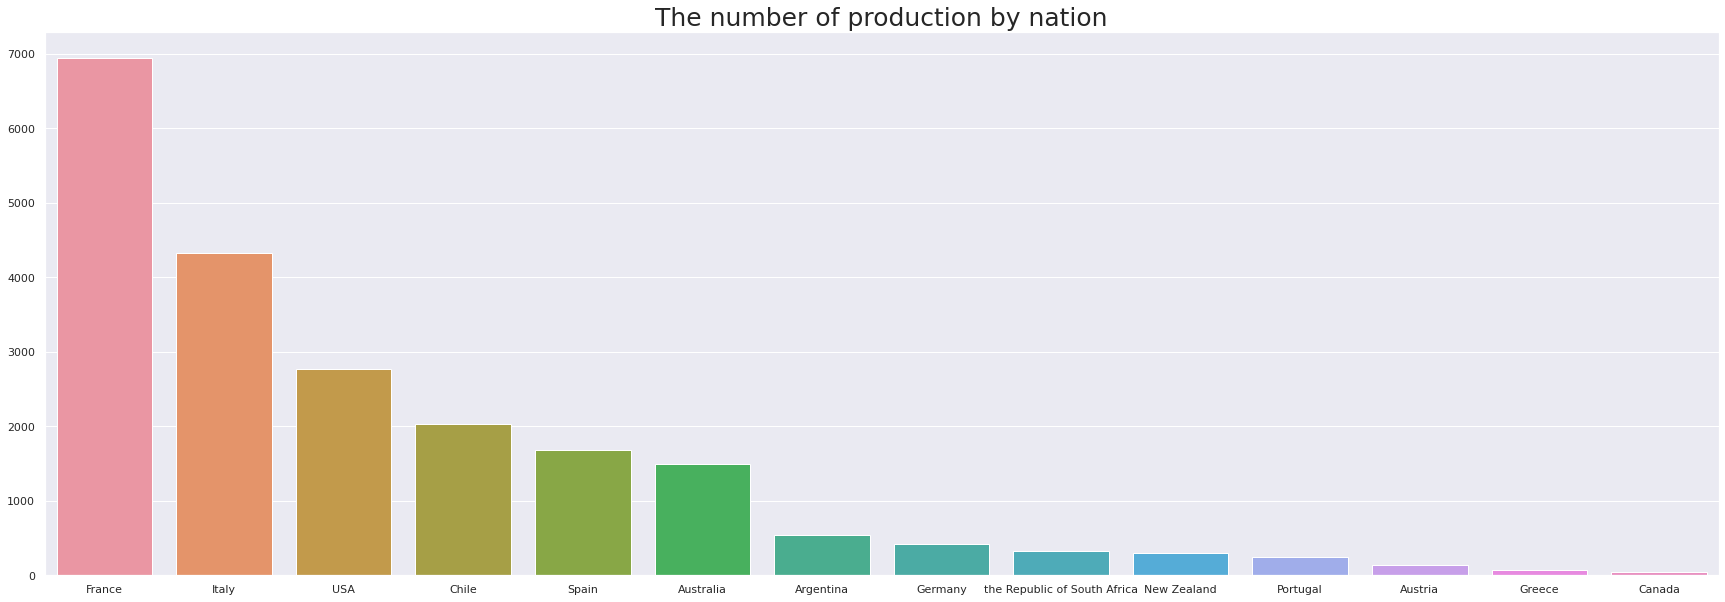

In [ ]:
plt.figure(figsize=(30,10))
data = df_clean['nation'].value_counts()
data = data[data.values > 50]
plt.title("The number of production by nation", fontsize=25)
ax = sns.barplot(data.index, data.values, x = "index", y = "value")

top_6_nations = list(data[:6].index)


프랑스, 이탈리아, 미국, 칠레, 스페인, 오스트레일리아 순으로 생산량이 많은 것을 확인 할 수 있다.

#### 주요 생산국 중 최대 생산 지역 Top 5

 주요 생산국 (프랑스, 이탈리아, 미국, 칠레, 스페인, 오스트레일리아) 데이터에서 각 국가마다 지역별 순위를 알아본다.

/home/lee/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/lee/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/lee/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/lee/.local/li

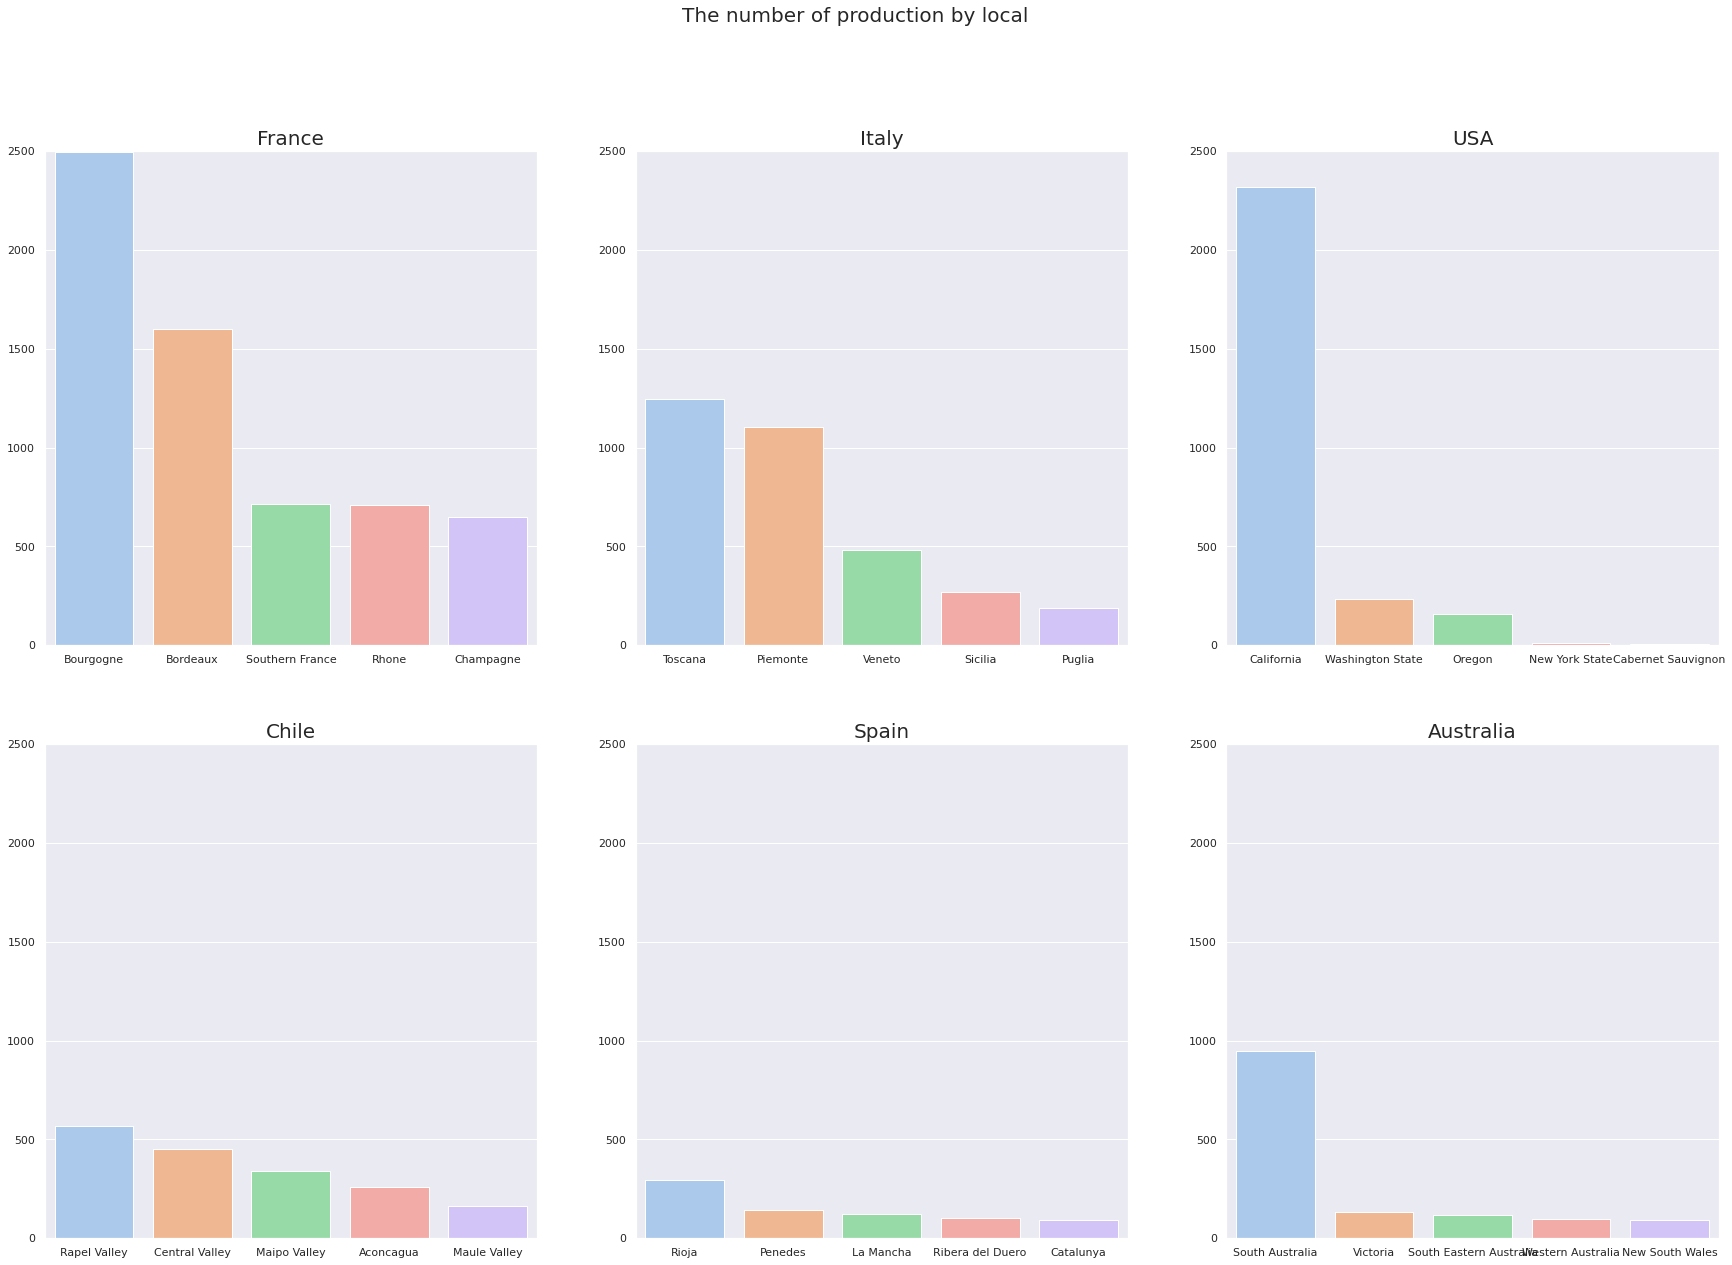

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(30,20))
fig.suptitle("The number of production by local", fontsize=20)

x, y = 0, 0
for idx in range(len(top_6_nations)):

    data = df_clean[df_clean['nation'] == top_6_nations[idx]]
    data = data["local1"].value_counts()[:5]
    if idx <3 :
        sns.barplot(data.index,data.values, palette='pastel', ax=axes[x,y])
        axes[x,y].set_title(top_6_nations[idx], fontsize=20)
        axes[x,y].set(ylim=(0, 2500))                                           # 객관적인 비교를 위해서 범주를 최댓값보다 큰 값으로 통일한다.
        y += 1
        if idx == 2:
            x += 1
            y = 0
    else:
        sns.barplot(data.index,data.values, palette='pastel', ax=axes[x,y])
        axes[x,y].set_title(top_6_nations[idx], fontsize=20)
        axes[x,y].set(ylim=(0, 2500))                                           # 객관적인 비교를 위해서 범주를 최댓값보다 큰 값으로 통일한다.
        y += 1


지역순으로 봤을 때는, 프랑스의 보르고뉴와 미국의 캘리포니아가 1,2위를 다퉜다.
프랑스의 두 지역인 보르고뉴와 보르도가 각각 세계 1위 3위 생산량을 기록하는걸 알 수 있다.

### 3.2 유형별 상품 개수 시각화


#### 와인 유형(Red, White, Spakling, Rose 등)별 개수 시각화

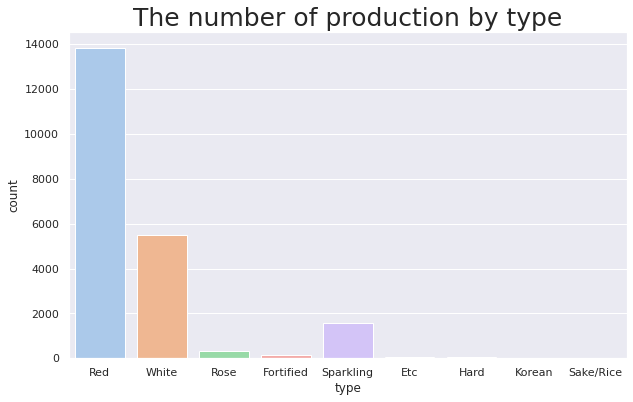

In [ ]:
# count producer
plt.figure(figsize=(10,6))
plt.title("The number of production by type", fontsize=25)

sns.set_theme(style='darkgrid')
ax = sns.countplot(x="type", data=df_clean, palette='pastel')

레드와인 제품이 압도적으로 많음을 확인할 수 있다.

#### 와인 용도(Table, Appetiger, Dessert)별 개수

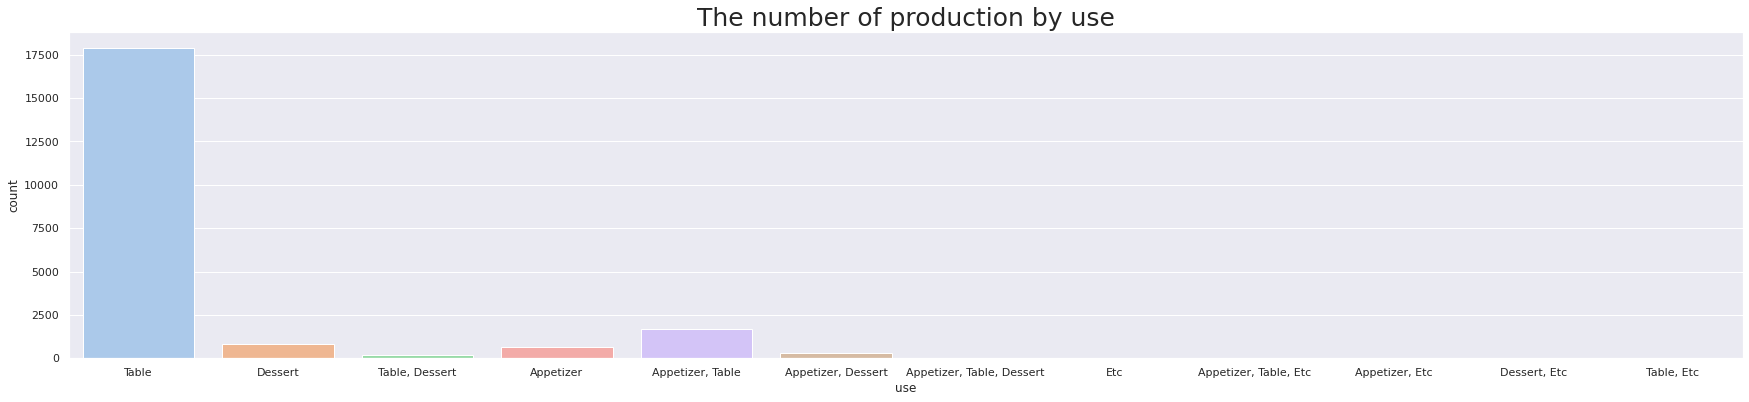

In [ ]:
# count producer
plt.figure(figsize=(30,6))
plt.title("The number of production by use", fontsize=25)

sns.set_theme(style='darkgrid')
ax = sns.countplot(x="use", data=df_clean, palette='pastel')

테이블 와인 용도로 나오는 상품이 가장 많음을 알 수 있다.

## 4. 데이터 전처리

크롤링을 진행하면서 데이터는 항목별로 잘 정리되어 있다.
- ImageDataGenerator를 이용해서 데이터를 0~1 범위로 rescale 한다.
- flow_from_directory 메서드를 사용해서 label데이터를 디렉토리 이름에서 찾도록 한다.
- 훈련용 데이터와 검증용 데이터를 분리한다.

In [ ]:
import tensorflow as tf

TRAINING_DIR = "./archive/imgs"
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR, target_size =(150, 150), class_mode="categorical")
validation_generator = training_datagen.flow_from_directory(TRAINING_DIR, target_size =(150, 150), class_mode="categorical")



Found 200 images belonging to 20 classes.
Found 200 images belonging to 20 classes.


## 5. 머신러닝 기본학습


### 5.1 모델 구현

CNN 모델을 구현한다.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(20, activation="softmax")
])

### 5.2 학습 수행

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [ ]:
EPOCHS = 20
history = model.fit_generator(train_generator, epochs=EPOCHS, validation_data = validation_generator, verbose=1)

/home/lee/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
7/7 [==============================] - 18s 2s/step - loss: 1.0036 - accuracy: 0.6900 - val_loss: 0.7379 - val_accuracy: 0.7700
Epoch 2/20
7/7 [==============================] - 17s 3s/step - loss: 0.7073 - accuracy: 0.7900 - val_loss: 0.4600 - val_accuracy: 0.8900
Epoch 3/20
7/7 [==============================] - 18s 3s/step - loss: 0.6347 - accuracy: 0.8200 - val_loss: 0.4786 - val_accuracy: 0.8950
Epoch 4/20
7/7 [==============================] - 17s 2s/step - loss: 0.7289 - accuracy: 0.8100 - val_loss: 0.3848 - val_accuracy: 0.9000
Epoch 5/20
7/7 [==============================] - 21s 3s/step - loss: 0.5862 - accuracy: 0.8600 - val_loss: 0.2578 - val_accuracy: 0.9200
Epoch 6/20
7/7 [==============================] - 20s 3s/step - loss: 0.4168 - accuracy: 0.8750 - val_loss: 0.3296 - val_accuracy: 0.9150
Epoch 7/20
7/7 [==============================] - 18s 3s/step - loss: 0.4387 - accuracy: 0.8850 - val_loss: 0.3029 - val_accuracy: 0.9300
Epoch 8/20
7/7 [==================

## 6. 평가 및 예측

학습을 수행하면서 Accuracy와 Loss의 변화를 그래프로 출력한다.

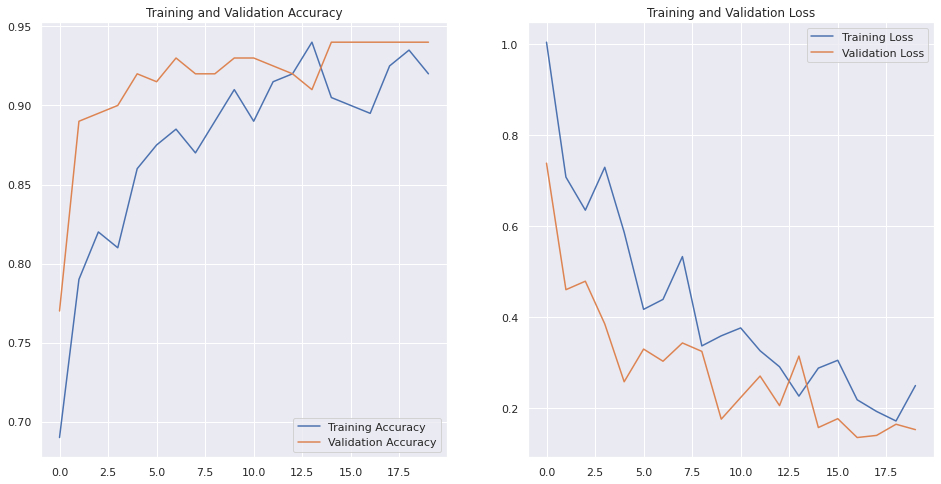

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

예측하기

소프트맥스 레이어를 이용하여 로짓을 해석하기 쉬운 확률로 변환합니다.

In [ ]:
from tensorflow import keras
img = keras.preprocessing.image.load_img('./test/images.jpg', target_size=(150, 150))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0.125161  , 0.04604416, 0.04604416, 0.04604416, 0.04604416,
       0.04604416, 0.04604416, 0.04604416, 0.04604416, 0.04604416,
       0.04604416, 0.04604416, 0.04604416, 0.04604416, 0.04604416,
       0.04604416, 0.04604416, 0.04604416, 0.04604416, 0.04604416],
      dtype=float32)>

In [ ]:
idx = np.argmax(score)
classes = train_generator.class_indices
list(classes.keys())[list(classes.values()).index(idx)]


'Altair'

모델의 epochs값을 조정해봐도 빈번히 실패한다. 데이터의 수가 부족하기 때문이라고 생각한다. 더 많은 데이터를 확보하는게 중요할 것 같다. 